Chapter 9 Recursion<br><br>
Recursion is *when a function calls itself.*

In [1]:
# Example

def f(k):
    if k > 0:
        return f(k-1) + k
    return 0

print(f(5))

15


The above example is to find the sum of numbers from 1 to k, it just finds the sum of the numbers from 1 to k −1 and then adds k.<br>
To solve a problem given some input k and we pretended we already had a solution for smaller numbers (k − 1 in this case). Then, we used that solution to construct a solution for k. The magic comes from the fact that the ”pretended” solution was actually the same function.(we can assume that the pretended soltution is the base case in the function)

9.1 Recursion and Induction<br><br>
The function f above finds the sum of numbers from 1 to k. We can check it using something called **induction**. In fact, this checking process is exactly what it means to ”do a proof by induction”. There, you prove a fact, by checking that it is true in the base case. Then, you prove that it’s true for k assuming it’s true for k - 1. In the special case of checking that our function f is identical to the sumk function that simply returns $\frac{k(k+1)}{2}$, it looks as follows.<br>
First check base case,
$$
f(0) \ = \ 0 \ = \ \frac{0 * (0 + 1)}{2}
$$
Then observe,
$$
f(k) = f(k - 1) + k \ = \ \frac{(k - 1)(k - 1 + 1)}{2} \ + \ k \ = \ \frac{(k - 1)k+2k}{2} \ = \ \frac{k(k + 1)}{2}
$$

9.2 Some Basics<br><br>
Rules to follow to make the recursive algorithm terminate:
- Have a base case.
- Recursive calls should move towards the base case. This usually means that the recursive calls are made on ”smaller” subproblems.

In practice, so-called infinite recursion is pretty quickly discovered with a RecursionError. Python has a limit on the recursion depth. This limit is usually around 1000.

9.3 The Function Call Stack<br><br>
This helps to have an idea of how recursion works on a real computer.

In [2]:
# Example
def f(k):
    var = k ** 2
    return g(k+1) + var

def g(k):
    var = k + 1
    return var + 1

print(f(3))

15


In [3]:
# Eample for RecursionError

def a(k):
    if k == 0: return 0
    return b(k)

def b(k):
    return c(k)

def c(k):
    return a(k - 1)

a(991)

RecursionError: maximum recursion depth exceeded

In [ ]:
# Another example for RecursionError

A = [2]
B = [2]
A.append(A)
B.append(B)
A == B

RecursionError: maximum recursion depth exceeded in comparison

In this case, the recursive function is list. eq , the method that compares two lists when you use ==. It compares the list by checking if the elements are equal. The lists A and B each have length 2. The first elements match. The second element of each list is another list. To compare them, there is another call to list. eq . This is a repeat of the first call and the process repeats until the recursion limit is reached.

9.4 The Fibonacci Sequence

In [ ]:
def fib(k):
    if k in [0, 1]: return k
    return fib(k - 1) + fib(k - 2)

print([fib(i) for i in range(15)])

[0, 1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144, 233, 377]


This works, but it starts to get really slow, even for small values of k. For example, k = 40

In [ ]:
# Version that uses a loop.
def fib(k):
    a, b = 0,1
    for i in range(k):
        a, b = b, a + b
    return a
print(fib(400))

176023680645013966468226945392411250770384383304492191886725992896575345044216019675


At first look, it might seem like the only difference in the total work is just in the extra overhead of making function calls rather than updating local variables.<br><br>
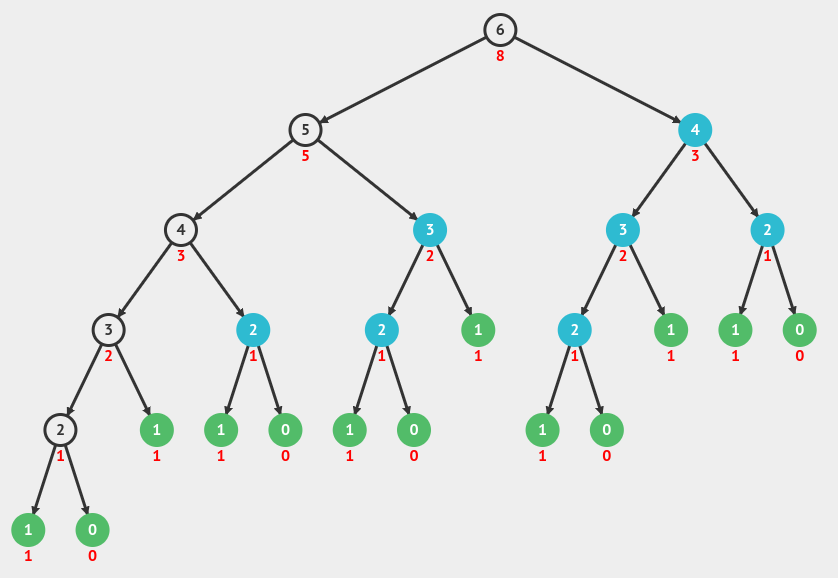<br><br>
Let’s say we called fib(6). This makes calls to fib(5) and fib(4). This, in turn makes calls to fib(4) and fib(3) as well as fib(3) and fib(2). Each of these four function calls will make two more function calls each. We can draw them out in a tree. Notice, that already, we have multiple calls to fib(4) as well as to fib(3). We might as well ask, how many times will we call the same function with the same value? If we compute fib(k), the answer, interestingly enough is related to the Fibonacci numbers themselves. Let T (k) denote the number of calls to fib when computing fib(k). It’s easy to see that T (k) = T (k − 1) + T (k − 2) + 1. In this case, the result is nearly exactly the Fibonacci numbers (T (1) = 1, T (2) = 2, T (3) = 4, T (4) = 7, ...).<br><br>
You can visualise recursion better [here](https://visualgo.net/en/recursion).<br><br>
In each case, the value of T is one less than a Fibonacci number. Thus, the running time of fib will grow like the Fibonacci numbers, or equivalently, it will grow like ideal rabbit families, exponentially. The k<sup>th</sup> Fibonacci number is about φ<sup>k</sup> , where φ = $\frac{1 + \sqrt{5}}{2} ∼ 1.618$ is known as the Golden Ratio.

9.5 Euclid’s Algorithm<br><br>
Euclid’s algorithm is a classic in every sense of the word. The input is a pair of integers a, b and the output is the greatest common divisor.

In [ ]:
def gcd(a, b):
    if a == b:
        return a
    if a > b:
        a, b = b, a
    return gcd(a, b - a)

Here, if a == b, then a (or equivalently, b) is the answer and we return it. Otherwise, we arrange it so a < b and make a recursive call: gcd(a, b - a).<br>

We can just do the division directly rather than repeatedly subtracting the smaller from the bigger. The result is a slight change to the base case andreplacing the subtraction with the modulus operation.

In [ ]:
def gcd(a, b):
    if a > b:
        a, b = b, a
    if a == 0:
        return b
    return gcd(a, b % a)

print("GCD of 12 and 513 is", gcd(12, 513))
print("GCD of 19 and 513 is", gcd(19, 513))
print("GCD of 19 and 515 is", gcd(515 ,19))

GCD of 12 and 513 is 3
GCD of 19 and 513 is 19
GCD of 19 and 515 is 1
